In [24]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel("Downloads/Basketball/NBA/NBA 2022 - advanced + totals.xlsx")

# List of column names you want to keep
selected_columns = ["namePlayer", "slugPosition", "agePlayer", "slugTeamBREF", "minutes",
                   "pctTrueShooting", "pctFG2", "pctFG3", "pctFT",
                   "pctUSG", "pctAST", "pctTOV", "pctORB",
                   "pctBLK", "pctSTL", "ratioDBPM", "pctDRB"]

df["True Shooting %"] = df["pctTrueShooting"].astype(float)
df["2-points %"] = df["pctFG2"].astype(float)
df["3-points %"] = df["pctFG3"].astype(float)
df["Free-throw %"] = df["pctFT"].astype(float)
df["Usage &"] = df["pctUSG"].astype(float)
df["Assist %"] = df["pctAST"].astype(float)
df["Turnover %"] = df["pctTOV"].astype(float)
df["Off. rebound %"] = df["pctORB"].astype(float)
df["Block %"] = df["pctBLK"].astype(float)
df["Steal %"] = df["pctSTL"].astype(float)
df["Defensive BPM"] = df["ratioDBPM"].astype(float)
df["Def. rebounding %"] = df["pctDRB"].astype(float)



# Select the desired columns
selected_df = df[selected_columns]

selected_df["True Shooting %"] = selected_df["pctTrueShooting"].astype(float)
selected_df["2-points %"] = selected_df["pctFG2"].astype(float)
selected_df["3-points %"] = selected_df["pctFG3"].astype(float)
selected_df["Free-throw %"] = selected_df["pctFT"].astype(float)
selected_df["Usage &"] = selected_df["pctUSG"].astype(float)
selected_df["Assist %"] = selected_df["pctAST"].astype(float)
selected_df["Turnover %"] = selected_df["pctTOV"].astype(float)
selected_df["Off. rebound %"] = selected_df["pctORB"].astype(float)
selected_df["Block %"] = selected_df["pctBLK"].astype(float)
selected_df["Steal %"] = selected_df["pctSTL"].astype(float)
selected_df["Defensive BPM"] = selected_df["ratioDBPM"].astype(float)
selected_df["Def. rebounding %"] = selected_df["pctDRB"].astype(float)

selected_df = selected_df.drop(["pctTrueShooting", "pctFG2", "pctFG3", "pctFT",
                   "pctUSG", "pctAST", "pctTOV", "pctORB",
                   "pctBLK", "pctSTL", "ratioDBPM", "pctDRB"],axis=1)

# Save the new DataFrame to a new Excel file
selected_df.to_excel("Downloads/Basketball/NBA/NBA Players 2022-2023.xlsx")


/var/folders/34/zddkb62n3590wbtcq5cfz3z40000gn/T/ipykernel_5531/1201506344.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df["True Shooting %"] = selected_df["pctTrueShooting"].astype(float)
/var/folders/34/zddkb62n3590wbtcq5cfz3z40000gn/T/ipykernel_5531/1201506344.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df["2-points %"] = selected_df["pctFG2"].astype(float)
/var/folders/34/zddkb62n3590wbtcq5cfz3z40000gn/T/ipykernel_5531/1201506344.py:32: SettingWithCopyWarning: 
A value

[4, 24, 'Dalano Banton', 0.505, 0.506, 0.294, 0.708, 0.242, 0.193, 0.114, 0.042, 0.045, 0.023, 0.6, 0.149]
12
15 None
12
12 None


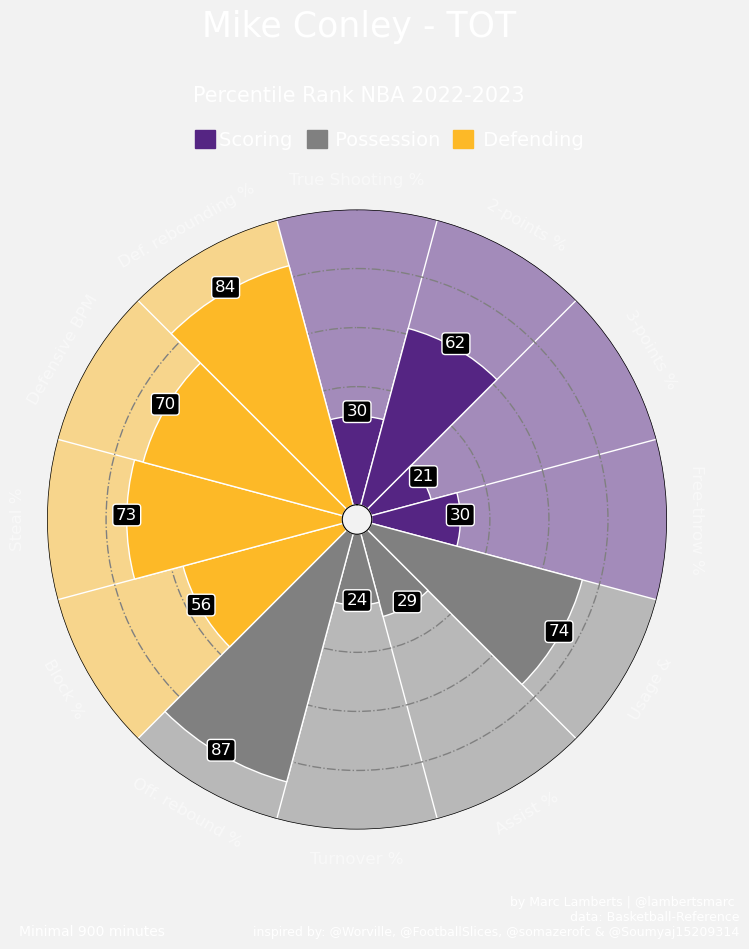

In [35]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

#import csv of premier league defensive stats from fbref. I have uploaded the data but I changed the column names in the csv prior.
#df = pd.read_excel('SCO1 AM ATT.xlsx')
df = pd.read_excel('Downloads/Basketball/NBA/NBA Players 2022-2023.xlsx')
#df = pd.read_excel('SCO1 Wingers.xlsx')
df = df[df['slugPosition'] == 'PG']  # Filter players with 'Position' = 'PG'

#when you first read in the csv from fbref, you'll notice the player names are kind of weird. This code splits them on the \
df['namePlayer'] = df['namePlayer'].str.split('\\',expand=True)[0]

df = df.drop(['slugTeamBREF', 'slugPosition', 'agePlayer', 'minutes'],axis=1).reset_index()


#Create a parameter list
params = list(df.columns)
params

params = params[2:]
params

player = df.loc[df['namePlayer']=='Dalano Banton'].reset_index()
player = list(player.loc[0])
print(player)

df.namePlayer.values

# the length of our players in longer than the length of the params. we need to drop the first 3 player list items
print(len(player),print(len(params)))
player = player[3:]
print(len(player),print(len(params)))

values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))
    
round(stats.percentileofscore(df[params[0]],player[0]))

for n,i in enumerate(values):
    if i == 100:
        values[n] = 99
        
baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="white",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

# color for the slices and tex
#slice_colors = ["#008000"] * 6 + ["#FF9300"] * 3     + ["#D70232"] * 3
slice_colors = ["#552583"] * 4 + ["grey"] * 4     + ["#FDB927"] * 4

text_colors = ["#000000"] * 8 + ["white"] * 5

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8.5),      # adjust figsize according to your need
    param_location=110,# where the parameters will be added
    color_blank_space="same",
    slice_colors=slice_colors,
    kwargs_slices=dict( 
        edgecolor="white",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="white", fontsize=12,
        va="center", alpha=.5
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="white", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="white", facecolor="#000000",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Mike Conley - TOT\n\n", size=25,
    ha="center", color="white"
)

# add subtitle
fig.text(
    0.515, 0.932,
    #"Per 90 Percentile Rank defenders WSL 22/23-\n\n",
    "Percentile Rank NBA PG 2022-2023\n\n",
    size=15,
    ha="center", color="white"
)

fig.text(
    0.09, 0.005, f"Minimal 900 minutes", color="white")

# add credits
notes = '@lambertsmarc'
CREDIT_1 = "by Marc Lamberts | @lambertsmarc \ndata: Basketball-Reference"
CREDIT_2 = '@lambertsmarc'
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"
CREDIT_3 = "by Alina Ruprecht | @alina_rxp"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="white",
    ha="right"
)


# add text
fig.text(
    0.34, 0.935, "Scoring       Possession       Defending                ", size=14,color="white"
    #0.34, 0.935, "Defending       Attacking       Passing                ", size=14,color="white"

)

 #add rectangles
fig.patches.extend([
    plt.Rectangle(
       (0.31, 0.9325), 0.025, 0.021, fill=True, color="#552583",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.450, 0.9325), 0.025, 0.021, fill=True, color="grey",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9325), 0.025, 0.021, fill=True, color="#FDB927",
        transform=fig.transFigure, figure=fig
    ),
])


plt.savefig('Jarrett Allen.png',dpi=750,bbox_inches = 'tight', facecolor='#000000')





